# SPOT Kriging in 6 Dimensions: Exact (Rosenbrock Function)

This notebook demonstrates how to use the `Spot` class from `spotpython` with and without the Nyström approximation for Kriging surrogates on the 6-dimensional Rosenbrock function.

We use a maximum of 100 function evaluations.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init

Seed set to 123


## Define the 6D Rosenbrock Function

In [2]:
dim = 6
lower = np.full(dim, -2)
upper = np.full(dim, 2)
fun = Analytical().fun_rosenbrock
fun_evals = 100

## Set up SPOT Controls

## Regression and y as Infill Criterion

In [3]:
init_size = dim
use_nystrom = False
method = "regression"
infill_criterion = "y"
tolerance_x = 1e-9
seed = 321
max_surrogate_points = fun_evals
min_Lambda = -4
max_Lambda = 3
min_theta = -3
max_theta = 2
isotropic = False
kernel = "matern"
kernel_params = {"nu": 1.5}
selection_method = "distance"
min_success_rate = 0.2
max_time = 60

In [4]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=True,
    tensorboard_log=True,
    kernel=kernel,
    kernel_params=kernel_params,
    selection_method=selection_method,
    min_success_rate=min_success_rate,
    max_time=max_time
)
design_control = design_control_init(init_size=init_size)
surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, method=method, max_surrogate_points=max_surrogate_points, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Moving TENSORBOARD_PATH: runs/ to TENSORBOARD_PATH_OLD: runs_OLD/runs_2025_11_04_22_45_37_0
Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-04_22-45-37 for SummaryWriter()


# Sklearn Gaussian Process Regressor as Surrogate

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

# Increase upper bound from 1e9 to 1e12
kernel = ConstantKernel(1.0, (1e-2, 1e12)) * RBF(length_scale=1.0, length_scale_bounds=(1e-4, 1e2))
S_GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)
spot_exact_sk = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control_exact,
    surrogate=S_GP,
)
spot_exact_sk.run()

spotpython tuning: 321.8341532536645 [#---------] 7.00%. Success rate: 0.00% 
spotpython tuning: 321.8341532536645 [#---------] 8.00%. Success rate: 0.00% 
spotpython tuning: 321.8341532536645 [#---------] 9.00%. Success rate: 0.00% 
spotpython tuning: 321.8341532536645 [#---------] 10.00%. Success rate: 0.00% 
spotpython tuning: 321.8341532536645 [#---------] 11.00%. Success rate: 0.00% 
spotpython tuning: 321.8341532536645 [#---------] 12.00%. Success rate: 0.00% 
spotpython tuning: 321.8341532536645 [#---------] 13.00%. Success rate: 0.00% 
spotpython tuning: 169.18983046586717 [#---------] 14.00%. Success rate: 12.50% 
spotpython tuning: 169.18983046586717 [##--------] 15.00%. Success rate: 11.11% 
spotpython tuning: 113.17486055315601 [##--------] 16.00%. Success rate: 20.00% 
spotpython tuning: 100.5828015431356 [##--------] 17.00%. Success rate: 27.27% 
spotpython tuning: 100.5828015431356 [##--------] 18.00%. Success rate: 25.00% 
spotpython tuning: 36.12501313881861 [##-------

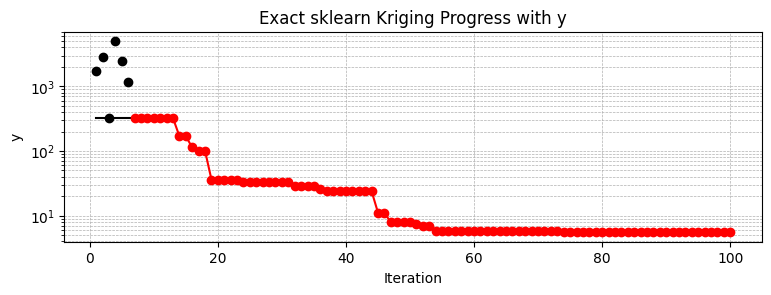

In [6]:
spot_exact_sk.plot_progress(log_y=True, title="Exact sklearn Kriging Progress with y")

In [7]:
print(f"[6D] Exact Kriging y: min y = {spot_exact_sk.min_y:.4f} at x = {spot_exact_sk.min_X}")


[6D] Exact Kriging y: min y = 5.5347 at x = [-0.3604405   0.14495521  0.03098248  0.00712057  0.01082623  0.00411143]
